# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [216]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [217]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [218]:
heroes_df.shape

(734, 11)

In [219]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [220]:
powers_df.shape

(667, 168)

In [221]:
heroes_df.describe()

,Unnamed: 0,Height,Weight
count,734.000000,734.000000,732.000000
mean,366.500000,102.254087,43.855191
std,212.031837,139.624543,130.823733
min,0.000000,-99.000000,-99.000000
25%,183.250000,-99.000000,-99.000000
50%,366.500000,175.000000,62.000000
75%,549.750000,185.000000,90.000000
max,733.000000,975.000000,900.000000


In [222]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Cerebra,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


In [223]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
Unnamed: 0    734 non-null int64
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [224]:
heroes_df.isna().sum()

Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [225]:
heroes_df.isna().any().sum()

2

In [226]:
heroes_df.loc[heroes_df.Weight.isna(),:]

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
286,286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
389,389,King Kong,Male,yellow,Animal,Black,30.5,NaN,-,good,NaN


In [227]:
heroes_df.Weight.describe()

count    732.000000
mean      43.855191
std      130.823733
min      -99.000000
25%      -99.000000
50%       62.000000
75%       90.000000
max      900.000000
Name: Weight, dtype: float64

In [228]:
heroes_df.sort_values('Weight').tail(10)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
718,718,Wolfsbane,Female,green,-,Auburn,366.0,Marvel Comics,-,good,473.0
119,119,Bloodaxe,Female,blue,Human,Brown,218.0,Marvel Comics,-,bad,495.0
283,283,Giganta,Female,green,-,Red,62.5,DC Comics,-,bad,630.0
331,331,Hulk,Male,green,Human / Radiation,Green,244.0,Marvel Comics,green,good,630.0
549,549,Red Hulk,Male,yellow,Human / Radiation,Black,213.0,Marvel Comics,red,neutral,630.0
203,203,Darkseid,Male,red,New God,No Hair,267.0,DC Comics,grey,bad,817.0
373,373,Juggernaut,Male,blue,Human,Red,287.0,Marvel Comics,-,neutral,855.0
575,575,Sasquatch,Male,red,-,Orange,305.0,Marvel Comics,-,good,900.0
286,286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
389,389,King Kong,Male,yellow,Animal,Black,30.5,NaN,-,good,NaN


In [229]:
heroes_df.sort_values('Weight').head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
366,366,John Constantine,Male,blue,Human,Blond,183.0,DC Comics,-,good,-99.0
390,390,King Shark,Male,black,Animal,No Hair,-99.0,DC Comics,-,bad,-99.0
520,520,Plastic Lad,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
163,163,Cat II,Female,-,-,-,-99.0,Marvel Comics,-,good,-99.0
387,387,Killer Frost,Female,blue,Human,Blond,-99.0,DC Comics,blue,bad,-99.0


In [230]:
len(heroes_df.loc[heroes_df.Weight < 0]) / len(heroes_df)

0.3228882833787466

In [231]:
len(heroes_df.loc[heroes_df.Height < 0]) / len(heroes_df)

0.2956403269754768

In [232]:
len(heroes_df.loc[(heroes_df.Weight < 0) | (heroes_df.Height < 0)]) / len(heroes_df)

0.329700272479564

In [233]:
len(heroes_df.loc[(heroes_df.Weight < 0) & (heroes_df.Height < 0)]) / len(heroes_df)

0.2888283378746594

In [234]:
heroes_df.Gender.unique()

array(['Male', 'Female', '-'], dtype=object)

In [235]:
heroes_df.Gender.value_counts()

Male      505
Female    200
-          29
Name: Gender, dtype: int64

In [236]:
heroes_df.loc[heroes_df.Gender == '-'].head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
87,87,Bird-Brain,-,-,-,-,-99.0,Marvel Comics,-,good,-99.0
112,112,Blaquesmith,-,black,-,No Hair,-99.0,Marvel Comics,-,good,-99.0
133,133,Box III,-,blue,-,Blond,193.0,Marvel Comics,-,good,110.0
134,134,Box IV,-,brown,-,Brown / Black,-99.0,Marvel Comics,-,good,-99.0
160,160,Captain Universe,-,-,God / Eternal,-,-99.0,Marvel Comics,-,good,-99.0


In [237]:
heroes_df.Gender.replace(to_replace='-', value='Unspecified', inplace=True)

In [238]:
heroes_df.Gender.value_counts()

Male           505
Female         200
Unspecified     29
Name: Gender, dtype: int64

In [239]:
heroes_df['Eye color'].value_counts()

blue                       225
-                          172
brown                      126
green                       73
red                         46
black                       23
yellow                      19
white                       17
hazel                        6
grey                         6
purple                       4
gold                         3
violet                       2
yellow (without irises)      2
amber                        2
silver                       1
yellow / red                 1
bown                         1
green / blue                 1
blue / white                 1
white / red                  1
indigo                       1
yellow / blue                1
Name: Eye color, dtype: int64

In [240]:
len(heroes_df.loc[heroes_df['Eye color'] == '-']) / len(heroes_df)   # categorical  make it's own bin 'unknown'

0.23433242506811988

In [241]:
heroes_df.loc[heroes_df['Eye color'] == '-'].tail(8)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
688,688,Vegeta,Male,-,Saiyan,Black,168.0,Shueisha,-,bad,73.0
692,692,Venompool,Male,-,Symbiote,-,226.0,Marvel Comics,-,-,-99.0
696,696,Vindicator,Male,-,-,-,-99.0,Marvel Comics,-,good,-99.0
697,697,Violator,Male,-,-,-,-99.0,Image Comics,-,bad,-99.0
711,711,Watcher,Male,-,-,-,-99.0,Marvel Comics,-,good,-99.0
712,712,Weapon XI,Male,-,-,-,-99.0,Marvel Comics,-,bad,-99.0
715,715,Wildfire,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
723,723,Wondra,Female,-,-,-,-99.0,Marvel Comics,-,good,-99.0


In [242]:
heroes_df['Eye color'].replace(to_replace='-', value= 'Unspecified', inplace=True)

In [243]:
heroes_df['Eye color'].value_counts()

blue                       225
Unspecified                172
brown                      126
green                       73
red                         46
black                       23
yellow                      19
white                       17
hazel                        6
grey                         6
purple                       4
gold                         3
violet                       2
yellow (without irises)      2
amber                        2
yellow / red                 1
bown                         1
green / blue                 1
blue / white                 1
white / red                  1
indigo                       1
yellow / blue                1
silver                       1
Name: Eye color, dtype: int64

In [244]:
heroes_df.Race . value_counts () . head()

-                304
Human            208
Mutant            63
God / Eternal     14
Cyborg            11
Name: Race, dtype: int64

In [245]:
len(heroes_df.loc[heroes_df.Race == '-']) / len(heroes_df)  # 40% but categorical to bin as unspecified

0.4141689373297003

In [246]:
heroes_df.Race.replace(to_replace='-', value='Unspecified', inplace=True)

In [247]:
heroes_df.Race.value_counts().head()

Unspecified          304
Human                208
Mutant                63
God / Eternal         14
Human / Radiation     11
Name: Race, dtype: int64

In [248]:
len(heroes_df.loc[heroes_df['Hair color'] == '-']) / len(heroes_df) # 23 % but categorical. -> unspec.

0.23433242506811988

In [249]:
heroes_df['Hair color'].replace(to_replace= '-', value='Unspecified', inplace=True)

In [250]:
heroes_df['Hair color'].value_counts().head()

Unspecified    172
Black          158
Blond           99
Brown           86
No Hair         75
Name: Hair color, dtype: int64

In [251]:
len(heroes_df.loc[heroes_df['Skin color'] == '-']) / len(heroes_df) # 90% of data. gotta drop this COLUMN

0.9019073569482289

In [252]:
heroes_df.drop('Skin color', axis = 1, inplace=True)

In [253]:
heroes_df.columns

Index(['Unnamed: 0', 'name', 'Gender', 'Eye color', 'Race', 'Hair color',
       'Height', 'Publisher', 'Alignment', 'Weight'],
      dtype='object')

In [254]:
len(heroes_df.loc[heroes_df.Alignment == '-']) / len(heroes_df)    # 1% of data just drop these rows

0.009536784741144414

In [255]:
heroes_df.drop(heroes_df[heroes_df.Alignment == '-'].index, axis=0, inplace=True)

In [256]:
heroes_df.Alignment.value_counts()

good       496
bad        207
neutral     24
Name: Alignment, dtype: int64

In [257]:
# heroes_df.loc[heroes_df.Alignment == 'neutral']

In [258]:
# heroes_df[heroes_df.Alignment == 'neutral']

In [259]:
powers_df.isna().any().sum()

0

In [260]:
heroes_df.isna().sum()

Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     14
Alignment      0
Weight         2
dtype: int64

In [261]:
heroes_df.drop(heroes_df[heroes_df.Publisher.isna()].index, axis=0, inplace=True)

In [262]:
heroes_df.isna().sum()

Unnamed: 0    0
name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Alignment     0
Weight        0
dtype: int64

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [263]:
heroes_df.columns

Index(['Unnamed: 0', 'name', 'Gender', 'Eye color', 'Race', 'Hair color',
       'Height', 'Publisher', 'Alignment', 'Weight'],
      dtype='object')

In [264]:
heroes_df.Height.median()

175.0

In [265]:
heroes_df.Height.replace(to_replace= -99.0, value=heroes_df.Height.median(), inplace=True)

In [266]:
heroes_df.Height.describe()

count    713.000000
mean     183.598878
std       50.258138
min       15.200000
25%      175.000000
50%      175.000000
75%      185.000000
max      975.000000
Name: Height, dtype: float64

In [267]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 733
Data columns (total 10 columns):
Unnamed: 0    713 non-null int64
name          713 non-null object
Gender        713 non-null object
Eye color     713 non-null object
Race          713 non-null object
Hair color    713 non-null object
Height        713 non-null float64
Publisher     713 non-null object
Alignment     713 non-null object
Weight        713 non-null float64
dtypes: float64(2), int64(1), object(7)
memory usage: 61.3+ KB


In [268]:
heroes_df.Weight.median()

63.0

In [269]:
heroes_df.Weight.replace(to_replace=-99.0, value=heroes_df.Weight.median(), inplace=True)

In [270]:
heroes_df.Weight.describe()

count    713.000000
mean      96.691445
std       89.173106
min        2.000000
25%       63.000000
50%       63.000000
75%       91.000000
max      900.000000
Name: Weight, dtype: float64

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [271]:
heroes_df.join(powers_df, on=(heroes_df.name.index, powers_df['hero_names'].index))

ValueError: len(left_on) must equal the number of levels in the index of "right"

In [272]:
heroes_df.set_index('name', inplace=True)

In [273]:
heroes_df.head()

,Unnamed: 0,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
name,,,,,,,,,
A-Bomb,0,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
Abe Sapien,1,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
Abin Sur,2,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
Abomination,3,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
Abraxas,4,Male,blue,Cosmic Entity,Black,175.0,Marvel Comics,bad,63.0


In [274]:
powers_df.set_index('hero_names', inplace=True)

In [275]:
powers_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
hero_names,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [276]:
combined_d = heroes_df.join(powers_df)

In [277]:
combined_d.shape

(713, 176)

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [278]:
gender_split = combined_d.groupby('Gender')

Gender
Female         AxesSubplot(0.125,0.125;0.775x0.755)
Male           AxesSubplot(0.125,0.125;0.775x0.755)
Unspecified    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

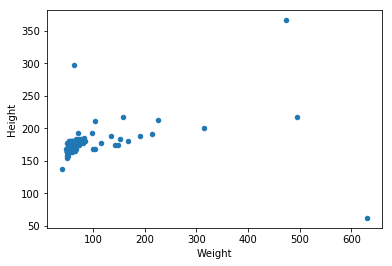

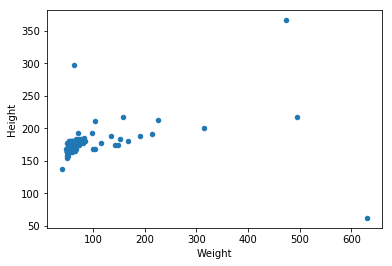

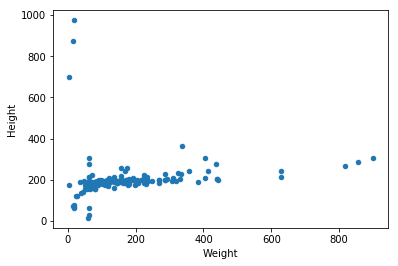

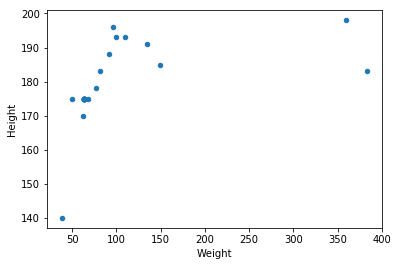

In [287]:
gender_split.plot.scatter('Weight', 'Height')

,Unnamed: 0,Height,Weight
Gender,,,
-,8625,1360.0,613.0
Female,78585,19808.5,5651.0
Male,174822,53293.5,26713.0


In [214]:
combined_d.describe()

,Unnamed: 0,Height,Weight
count,713.000000,713.000000,713.000000
mean,367.506311,104.434783,46.251052
std,212.316868,139.050021,130.347419
min,0.000000,-99.000000,-99.000000
25%,184.000000,-99.000000,-99.000000
50%,368.000000,175.000000,63.000000
75%,552.000000,185.000000,91.000000
max,733.000000,975.000000,900.000000


## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [288]:
male_heroes_df = None
female_heroes_df = None

def show_distplot(dataframe, gender, column_name):
    x = dataframe.loc[dataframe.Gender == gender, column_name]
    sns.distplot(x)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


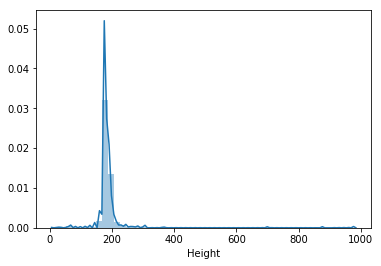

In [289]:
# Male Height
show_distplot(heroes_df, 'Male', 'Height')

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


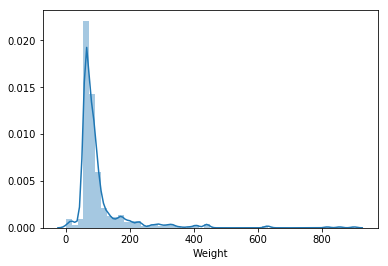

In [290]:
# Male Weight
show_distplot(heroes_df, 'Male', 'Weight')

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


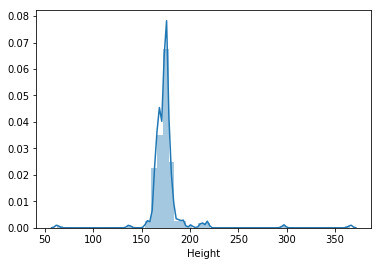

In [291]:
# Female Height
show_distplot(heroes_df, 'Female', 'Height')

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


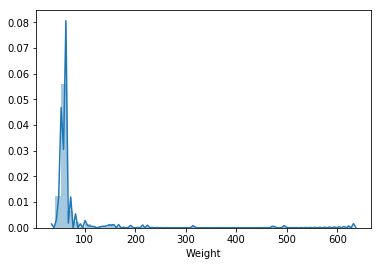

In [292]:
# Female Weight
show_distplot(heroes_df, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [315]:
# powers_df.applymap(int)

In [336]:
power_tuples = list(zip(powers_df.sum().index, powers_df.sum()))

In [346]:
power_tuples[:8]

[('Agility', 242),
 ('Accelerated Healing', 178),
 ('Lantern Power Ring', 11),
 ('Dimensional Awareness', 25),
 ('Cold Resistance', 47),
 ('Durability', 257),
 ('Stealth', 126),
 ('Energy Absorption', 77)]

In [344]:
sorted(power_tuples, key=lambda x: x[1], reverse=True)[:5]

[('Super Strength', 360),
 ('Stamina', 289),
 ('Durability', 257),
 ('Super Speed', 249),
 ('Agility', 242)]

In [345]:
powers_df.T.sum().head()

hero_names
3-D Man         4
A-Bomb          7
Abe Sapien     16
Abin Sur        1
Abomination     8
dtype: int64

In [357]:
power_counts_marvel = combined_d.loc[combined_d.Publisher == 'Marvel Comics', 'Agility':].sum()

In [358]:
power_counts_marvel.head()

Agility                  125.0
Accelerated Healing       98.0
Lantern Power Ring         0.0
Dimensional Awareness     15.0
Cold Resistance           25.0
dtype: float64

In [359]:
marvel_power_tuples = list(zip(power_counts_marvel.index, power_counts_marvel))

In [362]:
marvel_power_tuples[:5]

[('Agility', 125.0),
 ('Accelerated Healing', 98.0),
 ('Lantern Power Ring', 0.0),
 ('Dimensional Awareness', 15.0),
 ('Cold Resistance', 25.0)]

In [374]:
print('\n--MARVEL TOP FIVE POWERS--')
marvel_top_powers = sorted(marvel_power_tuples, key=lambda x: x[1], reverse=True) [:5]
marvel_top_powers


--MARVEL TOP FIVE POWERS--


[('Super Strength', 201.0),
 ('Durability', 151.0),
 ('Stamina', 148.0),
 ('Super Speed', 136.0),
 ('Agility', 125.0)]

In [368]:
power_counts_dc = combined_d.loc[combined_d.Publisher == 'DC Comics', 'Agility':].sum()

In [370]:
power_counts_dc.head()

Agility                  71.0
Accelerated Healing      51.0
Lantern Power Ring       11.0
Dimensional Awareness     7.0
Cold Resistance          15.0
dtype: float64

In [371]:
dc_power_tuples = list(zip(power_counts_dc.index, power_counts_dc))

In [376]:
dc_top_powers = sorted(dc_power_tuples, key=lambda x: x[1], reverse=True)[:5]
print('\nDC TOP FIVE POWERS')
print(dc_top_powers)
print('\nMARVEL TOP FIVE POWERS')
print(marvel_top_powers)


DC TOP FIVE POWERS
[('Super Strength', 109.0), ('Stamina', 90.0), ('Flight', 85.0), ('Super Speed', 79.0), ('Agility', 71.0)]

MARVEL TOP FIVE POWERS
[('Super Strength', 201.0), ('Durability', 151.0), ('Stamina', 148.0), ('Super Speed', 136.0), ('Agility', 125.0)]


Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [163]:
heroes_df = pd.read_csv('heroes_information.csv')

In [164]:
heroes_df.loc[heroes_df.Race == 'Alien'][['Race', 'Skin color']]

,Race,Skin color
41,Alien,gold
110,Alien,-
166,Alien,grey
229,Alien,-
247,Alien,green
341,Alien,-
600,Alien,silver


## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data